### Imports

In [1]:
import json
import time
import os
import pandas as pd
import numpy as np
import datetime as dt
import collections as c
from collections import Counter
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import sumy
from sumy.parsers.plaintext import PlaintextParser
%matplotlib inline

### Functions

In [2]:
def seaborn_graph(x,y,dataframe,title,xlabel,ylabel):
    """ Makes a seaborn graph with an x and y
    x = x axis values based on dataframe
    y = y axis values based on dataframe 
    dataframe = pandas dataframe
    title = title
    xlabels = label for the x axis
    ylabels = lables for the y axis
    """
    sns.set(style="whitegrid")

    f, ax = plt.subplots(figsize=(7, 7))

    sns.set_color_codes("pastel")
    sns.barplot(x=x, y=y, data=dataframe);

    plt.title(title, fontsize=15)

    ax.set_ylabel(ylabel, fontsize=10)
    ax.set_xlabel(xlabel, fontsize=10)

    sns.despine(left=True, bottom=False);
    
    
def df_to_vc_df(df,col_name,one_vc_col_name,second_vc_col_name):
    """
    INPUT: Dataframe, what column you want, and the name of the new columns in new df
    OUTPUT: Returns a datafame of value counts based on another dataframe passed in
    df - original dataframe
    col_name - column from original df you want to take value counts
    one_vc_col_name - name of the first column for the new value count df
    second_vc_col_name - name of the second column for nwe value count df
    """
    new_df = df[str(col_name)].value_counts().to_frame().reset_index()
    new_df = new_df.rename(columns={'index':str(one_vc_col_name), str(col_name):str(second_vc_col_name)})
    return new_df


def indicies(df,prediction_array):
    """
    INPUT: Dataframe and prediction array
    OUTPUT: Subset Dataframe of terrorist comments within original dataframe
    """
    
    find_terrorists = np.argwhere(prediction_array)
    stuff =[]
    for i in range(len(find_terrorists)):
        stuff.append(find_terrorists[i][0])
    
    return df.iloc[stuff,:]


def sentiments(df):
    
    """
    INPUT: Dataframe
    OUTPUT: Printed values of comments polarity and sentiment above a threshold
    """
    
    for comment in df.user_text:
        sentence = TextBlob(comment)
        polarity, senti = (np.asarray(sentence.sentiment))
        if polarity > .5 or senti >.5: # You can change the range of polarity here
            print ('User_id:', )
            print('COMMENT:', comment)
            print('POLARITY:', polarity)
            print ('SENTIMENT:', senti)
            
def suspended_accounts(df):
    suspended_a = []
    for i in df.index.tolist():
        for value in df.user_text[i].split('\n'):
            if 'https' in value:
                suspended_a.append(value)
    return suspended_a
    
def get_tweets(tweet_str):
    '''
    INPUT: JSON string of tweets
    OUTPUT: list of length 7 w/ the following values:
            tweet_id
            text
            user_id
            timestamp_ms
            created_at
            lang
            possibly_sensitive
    '''
    try:
        tweet = json.loads(tweet_str)
        tweet_id = tweet['id']
        text = tweet['text']
        user_id = tweet.get('user')
        screen_name = tweet.get('user').get('screen_name')
        name = tweet.get('user').get('name')
        follower_count = tweet.get('user').get('follower_count')
        friend_count = tweet.get('user').get('friend_count')
        if user_id:
            user_id = user_id.get('id')
        timestamp_ms = tweet.get('timestamp_ms')  # machine readable timestamp
        created_at = tweet.get('created_at')  # human readable timestamp
        created_at = time.strftime('%Y-%m-%d %H:%M:%S',
                        time.strptime(created_at,'%a %b %d %H:%M:%S +0000 %Y'))
        lang = tweet.get('lang')
        possibly_sensitive = tweet.get('possibly_sensitive')
        place = tweet.get('place')
        description = tweet.get('description')
        time_zone = tweet.get('time_zone')
        
        return [tweet_id, text, user_id, screen_name, name, follower_count, friend_count, timestamp_ms, created_at, lang,
                    possibly_sensitive, place, description, time_zone]
    except ValueError:
        pass

In [3]:
#Making it easy to make the original dataframe without a database
import os

ids =[]
user_ids = []
screen_n = []
nam = []
follow_c = []
friend_c = []
txt = []
timestamp = []
createdat= []
language = []
sensitive = []
p = []
descript = []
tz = []

path = '/Users/chaserenick/Downloads/twitter_files/'

for filename in os.listdir(path):
        each_file = "/Users/chaserenick/Downloads/twitter_files/" + str(filename)
        print (each_file)
        with open(each_file, 'r') as f:
            for line in f:
                line = f.readline() # read only the first tweet/line
                tweet = json.loads(line) # load it as Python dict

        #     #     print(json.dumps(tweet, indent=4)) # pretty-print
                t = (json.dumps(tweet, indent=4))
        # #         print (len(line))

                tweet_id, text, user_id, screen_name, name, follower_count, friend_count, timestamp_ms, created_at, lang, possibly_sensitive, place, description, time_zone = get_tweets(t)
                
                ids.append(tweet_id)
                txt.append(text)
                user_ids.append(user_id)
                screen_n.append(screen_name)
                nam.append(name)
                follow_c.append(follower_count)
                friend_c.append(friend_count)
                timestamp.append(timestamp_ms)
                createdat.append(created_at)
                language.append(lang)
                sensitive.append(possibly_sensitive)
                p.append(place)
                descript.append(description)
                tz.append(time_zone)

#         print (get_tweets(t))

/Users/chaserenick/Downloads/twitter_files/a_0_1.json
/Users/chaserenick/Downloads/twitter_files/a_0_2.json
/Users/chaserenick/Downloads/twitter_files/a_1_1.json
/Users/chaserenick/Downloads/twitter_files/a_1_2.json
/Users/chaserenick/Downloads/twitter_files/a_1_3.json
/Users/chaserenick/Downloads/twitter_files/a_1_6.json
/Users/chaserenick/Downloads/twitter_files/a_1_7.json
/Users/chaserenick/Downloads/twitter_files/a_1_9.json
/Users/chaserenick/Downloads/twitter_files/a_2_1.json
/Users/chaserenick/Downloads/twitter_files/a_2_2.json


### Build Training Dataframe from Tweets

In [4]:
df = {'twitter_id': ids,'user_text':txt,'timestamp':timestamp,
      'created_at':createdat,'language':language,'is_sensitive': sensitive,'place':p, 
      'description':descript, 'time_zone':tz, 'user_id':user_ids, 
      'screen_name':screen_n, 'name':nam, 'follower_count':follow_c, 'friend_count': friend_c}
twitter_df = pd.DataFrame(data=df)

In [5]:
# print (twitter_df.shape)

In [6]:
twitter_df.head()

,created_at,description,follower_count,friend_count,is_sensitive,language,name,place,screen_name,time_zone,timestamp,twitter_id,user_id,user_text
0,2017-03-31 06:34:15,None,None,None,None,en,Dar & POTUS TRUMP,None,DarLovesAmerica,None,1490942055538,847698537768902656,216498790,RT @miamivandynyu: @TEN_GOP And was fired by O...
1,2017-03-31 06:34:21,None,None,None,False,en,Isis Love,None,ItsIsisLove,None,1490942061445,847698562544578562,260550501,Click here to watch it: https://t.co/WUHDFnBij...
2,2017-03-31 06:34:25,None,None,None,False,en,Nn Gn,None,59nathang,None,1490942065924,847698581330972672,96367689,❤Holy world be aware🔥real islam Quran is Isis🔥...
3,2017-03-31 06:34:31,None,None,None,None,in,✌✌✌,None,HasdungHutagaol,None,1490942071691,847698605519417344,1722511368,RT @SuryoUdoro: Model dan cara2 ISIS Timur Ten...
4,2017-03-31 06:34:39,None,None,None,None,en,Nn Gn,None,59nathang,None,1490942079013,847698636230189057,96367689,RT @59nathang: ❤Holy world be aware🔥real islam...


In [7]:
# To actually see the comments 
count = 0
for i in range(0,3):
    count +=1
    print ('Comment:',i, twitter_df.user_text[i])
    print ('') #stopped at 807

Comment: 0 RT @miamivandynyu: @TEN_GOP And was fired by Obama because he knew Obama was doing nothing about ISIS.

Comment: 1 Click here to watch it: https://t.co/WUHDFnBijI
Latina solo model Isis Love showing off ...
👻Add me on snapchat: Se… https://t.co/CWmsfukp2Y

Comment: 2 ❤Holy world be aware🔥real islam Quran is Isis🔥🐉🐉91%Islam murders rapes &amp; fights within its own family🔥outside it do… https://t.co/46MpOFQNT7



### Creating Training Labels

In [8]:
zero_array = np.zeros((1,1608))

In [9]:
terrorist_array = [2,
                   4,
                   11,
                   16,
                   22,
                   23,
                   24,
                   27,
                   36,
                   42,
                   55,
                   56,
                   59,
                   60,
                   63,
                   85,
                   94,
                   103,
                   104,
                   135,
                   148,
                   157,
                   167,
                   172,
                   183,
                   184,
                   242,
                   246,
                   259,
                   268,
                   295,
                   321,
                   329,
                   403,
                   442,
                   460,
                   468,
                   482,
                   485,
                   486,
                   487,
                   488,
                   489,
                   490,
                   493,
                   502,
                   566,
                   572,
                   599,
                   615,
                   625,
                   630,
                   633,
                   652,
                   660,
                   694,
                   700,
                   745,
                   754,
                   759,
                   764,
                   788,
                   803,
                   807,
                   863,
                   865,
                   888,
                   899,
                   924,
                   973,
                   975,
                   980,
                   911,
                   992,
                   1050,
                   1088,
                   1118,
                   1119,
                   1159,
                   1162,
                   1168,
                   1123,
                   1208,
                   1213,
                   1250,
                   1279,
                   1272,
                   1287,
                   1291,
                   1313,
                   1320,
                   1337,
                   1351,
                   1352,
                   1356,
                   1368,
                   1395,
                   1418,
                   1429,
                   1462,
                   1504,
                   1514,
                   1538,
                   1548,
                   1546,
                   1571,
                   1575,
                   1600,
                   1605]

In [10]:
np.put(zero_array,terrorist_array,1)

In [11]:
zero_array = zero_array.tolist()[0]
y =zero_array
twitter_df['terror_or_not'] = y

### Verifying Dimensonality with new labels

In [12]:
twitter_df.shape

(1608, 15)

### Vectorizing

In [13]:
#max_df=0.95,min_df=2,max_features=1000,stop_words='english'
# REMEMBER TO TRY AND USE DIFFERENT VECTORIZERS 
vectorizer = CountVectorizer(max_features=1000,stop_words='english',lowercase=False,strip_accents='unicode')

#### Building a Naieve Model to Identify Terrorists

In [14]:
x_train, x_test, y_train, y_test = train_test_split(twitter_df.user_text,
                                        twitter_df.terror_or_not, test_size=.3,
                                        random_state=42)

In [15]:
X = vectorizer.fit_transform(x_train)
x = vectorizer.transform(x_test)

In [16]:
model = MultinomialNB().fit(X,y_train)

In [17]:
predictions = model.predict(x)

### Evalaution Metrics

In [18]:
f1_score(y_test,predictions)

0.84615384615384615

In [19]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, predictions, labels=None)
confusion_m

array([[438,   9],
       [  3,  33]])

#### Conclusions:
1. Based on training model does well at one thing - identifying other users on twitter who have reported possible accounts linked to terrorism @Twitter Safety.
2. Examining accounts which have not been suspended would be interesting to determine which if any should have been based on their content.

### Read in Test Set of Tweets 

In [20]:
ids =[]
user_ids = []
screen_n = []
nam = []
follow_c = []
friend_c = []
txt = []
timestamp = []
createdat= []
language = []
sensitive = []
p = []
descript = []
tz = []

path1 = '/Users/chaserenick/Downloads/twitter/'

for filename in os.listdir(path1):
        each_file = "/Users/chaserenick/Downloads/twitter/" + str(filename)
        print (each_file)
        with open(each_file, 'r') as f:
# with open('/Users/chaserenick/Downloads/twitter/a_2_3.json', 'r') as f:
            for line in f:
                line = f.readline() # read only the first tweet/line
                tweet = json.loads(line) # load it as Python dict
                t = (json.dumps(tweet, indent=4))

                tweet_id, text, user_id, screen_name, name, follower_count, friend_count, timestamp_ms, created_at, lang, possibly_sensitive, place, description, time_zone = get_tweets(t)

                ids.append(tweet_id)
                txt.append(text)
                user_ids.append(user_id)
                screen_n.append(screen_name)
                nam.append(name)
                follow_c.append(follower_count)
                friend_c.append(friend_count)
                timestamp.append(timestamp_ms)
                createdat.append(created_at)
                language.append(lang)
                sensitive.append(possibly_sensitive)
                p.append(place)
                descript.append(description)
                tz.append(time_zone)

/Users/chaserenick/Downloads/twitter/a_2_3.json
/Users/chaserenick/Downloads/twitter/a_2_6.json
/Users/chaserenick/Downloads/twitter/a_2_9.json


### Build a new dataframe of Test Data

In [21]:
df2 = {'twitter_id': ids,'user_text':txt,'timestamp':timestamp,
      'created_at':createdat,'language':language,'is_sensitive': sensitive,'place':p, 
      'description':descript, 'time_zone':tz, 'user_id':user_ids, 
      'screen_name':screen_n, 'name':nam, 'follower_count':follow_c, 'friend_count': friend_c}
twitter_df2 = pd.DataFrame(data=df2)

In [22]:
twitter_df2.head()

,created_at,description,follower_count,friend_count,is_sensitive,language,name,place,screen_name,time_zone,timestamp,twitter_id,user_id,user_text
0,2017-04-01 08:54:08,None,None,None,None,en,alyra 🥀,None,goldenhickey,None,1491036848930,848096130072068096,4477510398,RT @KomptonMusic: Fifth Harmony is the reason ...
1,2017-04-01 08:54:12,None,None,None,False,nl,El Cid,None,weijers3,None,1491036852933,848096146862067712,2256239927,RT @DrGertJanMulder: Uw politiek democratisch ...
2,2017-04-01 08:54:14,None,None,None,False,en,just .. محمد,None,1406Mo,None,1491036854075,848096151651876864,305455401,RT @TonyDuheaume: Iran’s Links to Al-Qaeda – i...
3,2017-04-01 08:54:21,None,None,None,None,en,Michel Verrier,None,Michel_Verrier,None,1491036861690,848096183591501824,2589643249,RT @GebeilyM: “I do oppose all American presen...
4,2017-04-01 08:54:25,None,None,None,False,en,M K Suraj,None,suraj_mk,None,1491036865380,848096199068569601,1138764877,"RT @Newsweek: ISIS propaganda team who ""brainw..."


### Predict on new tweets based on training data

In [23]:
new_predictions = model.predict(vectorizer.transform(twitter_df2.user_text))

In [24]:
terror_df = indicies(twitter_df2,new_predictions)

### Dataframe of newly identified accounts that list other suspicious accounts

In [25]:
terror_df.head()

,created_at,description,follower_count,friend_count,is_sensitive,language,name,place,screen_name,time_zone,timestamp,twitter_id,user_id,user_text
35,2017-04-01 08:56:02,None,None,None,False,en,CtrlSec,None,CtrlSec,None,1491036962618,848096606914326528,3012875395,Targeted #ISIS accounts\nhttps://t.co/MPybsxo4...
38,2017-04-01 08:56:14,None,None,None,False,en,cyberahsokatano,None,cyberahsokatano,None,1491036974497,848096656738455552,183757658,From ctrlsec2 Targeted #ISIS accounts\nhttps:/...
72,2017-04-01 08:58:04,None,None,None,False,en,♚✩ Faisal,None,Faisal5O1,None,1491037084137,848097116601954305,1722952628,@Support \n#OpISIS #SA_S_I_C\n#ISIS accounts\n...
87,2017-04-01 08:59:04,None,None,None,False,en,🔱🌜🌚🌛 🔱,None,sunny_wantsome,None,1491037144797,848097371028434944,14732713,⛔ISIS\n\n➡https://t.co/rvSXzh1edv\n🆔https://t....
105,2017-04-01 09:00:09,None,None,None,False,en,CtrlSec,None,CtrlSec,None,1491037209665,848097643104481280,3012875395,Targeted #ISIS accounts\nhttps://t.co/ldChL1Kh...


### Visualization of user profiles who report suspicous accounts

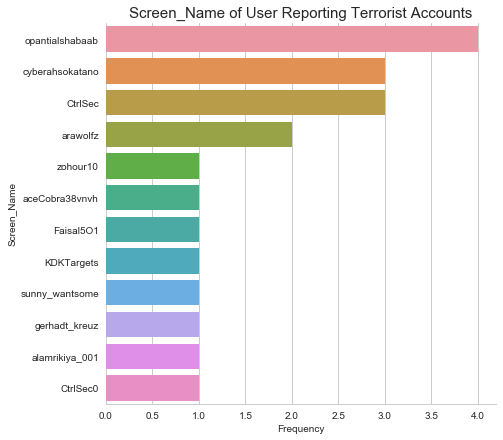

In [26]:
seaborn_graph('frequency', 'screen_name',df_to_vc_df(terror_df,'screen_name','screen_name','frequency'),'Screen_Name of User Reporting Terrorist Accounts','Frequency','Screen_Name')

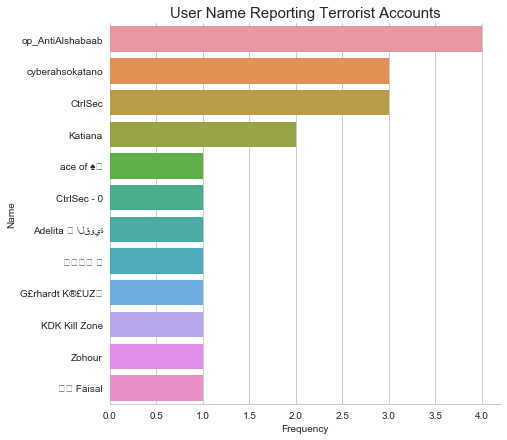

In [27]:
seaborn_graph('frequency', 'name',df_to_vc_df(terror_df,'name','name','frequency'),'User Name Reporting Terrorist Accounts','Frequency','Name')

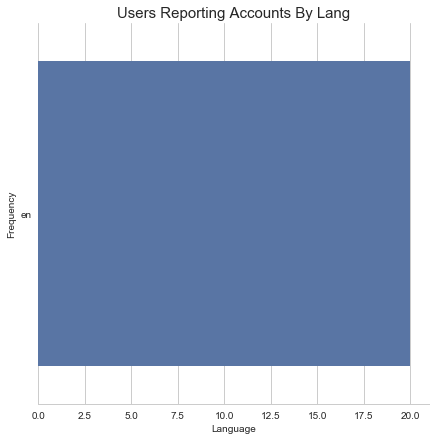

In [28]:
seaborn_graph('frequency','language',df_to_vc_df(terror_df,'language','language','frequency'),'Users Reporting Accounts By Lang','Language','Frequency')

In [89]:
sentiments(terror_df)

### List of suspended accounts from users who report them

In [30]:
suspended_accounts(terror_df)[:3]

['https://t.co/MPybsxo4u3',
 'https://t.co/DliGKkhZHD',
 'https://t.co/eCsQOfiMbr']

### New Functions to scrape accounts that have not already been suspended

In [33]:
import requests

def cleaned_suspended_account(accounts):
    n_list = []
    for value in accounts:
        v = value.replace('➡','').replace('🆔','')
        if (range(len(v))) == range(0,23):
            n_list.append(v)
    return n_list

c_list = cleaned_suspended_account(suspended_accounts(terror_df))

def user_list(all_http_sites):
    import re
    import requests
    from bs4 import BeautifulSoup
    
    terrorist_user_names=[]

    for website in all_http_sites:
        req = requests.get(str(website))
        sop = BeautifulSoup(req.text, 'html.parser')
        for link in sop.find_all('a'):
            if "user-profile-link" in str(link):
                matches = re.findall('screen_name=\w*', str(link))
                matches = str(matches).replace('screen_name=','')
                if matches:
                    terrorist_user_names.append(matches)
                    break
                break

    terrorist_user_names = list(set(terrorist_user_names))

    cleaned_list = []
    for name in terrorist_user_names:
        cleaned_list.append(name.replace('[','').replace(']','').replace("'",''))
    return cleaned_list

def get_arabic_text(user_names):
    from bs4 import BeautifulSoup
    import requests
    
    twitter_path = 'https://twitter.com/'
    docs = []
    for user in user_names:
        paragraphs = []
        r = requests.get(twitter_path+user)
        soup = BeautifulSoup(r.text, 'html.parser')
        length = len(soup.find_all('p'))
        count = 0
        for link in soup.find_all('p'):
            count += 1
            if count == length:
                docs.append(paragraphs) 
                paragraphs = []
            else:
                paragraphs.append(link)
    
    return docs

In [36]:
# get_arabic_text(user_list(c_list))

#### documents with arabic text

In [37]:
docs = get_arabic_text(user_list(c_list))

In [38]:
stuff = ['<','>','%','=','"','!','?','.','/','-','0','1','2','3','4','5','6','7','8','9','#','_', '',':','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','<','>','=','%']
arabic_sentences = {}
comments = []
polarity = []
subjectivity = []
for i in range(len(docs)):
    for j in range(len(docs[i])):
        if 'ال' in str(docs[i][j]):  #look for anything that begins with these characters 
            line = str(docs[i][j])
            for item in stuff:
                line = line.lower().replace(str(item),'')
            blob = TextBlob(line)
            arabic_to_english = blob.translate(to="en")
#             print (arabic_to_english)
            comments.append(arabic_to_english)
            polar, subj = arabic_to_english.sentiment
            polarity.append(polar)
            subjectivity.append(subj)

            arabic_sentences[j] = line

arabic_sentences

df3 = {'comments': comments,'polarity':polarity,'subjectivity':subjectivity}
terror_frame = pd.DataFrame(data=df3)

### Translate the Parsed Arabic Comments in the associated dataframe. 

In [39]:
translated_text = []
for i in range(len(terror_frame.comments)):
    translated_text.append(str(terror_frame.comments[i]))
#     print ('Comment:',i)
#     print (terror_frame.comments[i])
#     print('')

stuff = []
for i in translated_text:
    stuff.append(i.replace('\n',' ').replace('\xa0',' ').replace('()',''))

In [40]:
for i in range(0,3):
    print ('COMMENT', i)
    print (stuff[i])
    print ('')

COMMENT 0
As a matter of pain my mother hugged her instead of me   [Anonymus retired ,,, Technician 💧]

COMMENT 1
How to cancel application permissions Delete suspicious applications sites 🔴 🔴  Diq Al-Taqni (Osama Al-Dawawi)  👇 👇

COMMENT 2
If you are a Saudi programmer or Android and unemployed and work with us, we provide you with the opportunity to create applications using the @



### Label the comments within the reported accounts as potentially terrorist-like

In [41]:
y2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1]

#### Dataframe of comments and associated labels that denote suspicious comments

In [42]:
print (len(stuff))
print (len(y2))

71
77


In [147]:
df4 = {'arabic_comments': stuff,'labels':y2}
twitter_df4 = pd.DataFrame(data=df4)
twitter_df4.head()

,arabic_comments,labels
0,"I beg you from occupied Syria, a mediaman from...",0
1,Horrific moments passed by a courageous photog...,0
2,A man was kidnapped yesterday in the eastern H...,0
3,@ Alleh prove little Deir Deirzour and the res...,0
4,Netanyahu will not allow Iran to be militarily...,0


### Scrape a new account that might be suspicous 
#### (this could be anyone on Twitter you may find suspicious)

In [148]:
from bs4 import BeautifulSoup
import requests

web10 = 'https://twitter.com/Mema_0PS' ##I searched for an account that might be suspect to determine model worked
web11 = ''

website_list = [web10]

docs1 = []
for web in website_list:
    paragraphs = []
    r = requests.get(web)
    soup = BeautifulSoup(r.text, 'html.parser')
    length = len(soup.find_all('p'))
    count = 0
    for link in soup.find_all('p'):
        count += 1
        if count == length:
            docs1.append(paragraphs) 
            paragraphs = []
        else:
            paragraphs.append(link)

In [149]:
def new_comments(list_of_comments):
    stuff = ['<','>','%','=','"','!','?','.','/','-','0','1','2','3','4','5','6','7','8','9','#','_', '',':','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','<','>','=','%']
    arabic_sentences = {}
    comments = []
    polarity = []
    subjectivity = []
    for i in range(len(list_of_comments)):
        for j in range(len(list_of_comments[i])):
            if 'ال' in str(list_of_comments[i][j]):
                line = str(list_of_comments[i][j])
                for item in stuff:
                    line = line.lower().replace(str(item),'')
                blob = TextBlob(line)
                arabic_to_english = blob.translate(to="en")
    #             print (arabic_to_english)
                comments.append(arabic_to_english)
                polar, subj = arabic_to_english.sentiment
                polarity.append(polar)
                subjectivity.append(subj)

                arabic_sentences[j] = line

    arabic_sentences

    df3 = {'comments': comments,'polarity':polarity,'subjectivity':subjectivity}
    terror_frame = pd.DataFrame(data=df3)
    return terror_frame

In [150]:
new_comments(docs1)

,comments,polarity,subjectivity
0,"(O, u, r, , l, o, v, e, d, , o, n, e, s, , ...",0.650000,0.850000
1,"(O, h, , A, l, l, a, h, ,, , h, a, v, e, , ...",0.225000,0.425000
2,"(O, , A, l, l, a, h, ,, , f, o, r, g, i, v, ...",0.000000,0.000000
3,"(P, r, a, i, s, e, , t, o, , A, l, l, a, h, ...",0.000000,0.000000
4,"(H, a, m, a, s, , m, o, v, e, m, e, n, t, , ...",0.000000,0.000000
5,"(O, h, , G, o, d, ,, , h, e, a, l, , t, h, ...",0.000000,0.000000
6,"(B, e, a, u, t, i, f, u, l, , m, o, r, n, i, ...",0.425000,0.800000
7,"(O, , A, l, l, a, h, ,, , b, l, e, s, s, , ...",1.000000,0.300000
8,"(W, h, y, , d, o, , t, h, e, , S, a, l, a, ...",0.000000,0.000000
9,"(E, d, i, t, , غ, ز, ة, , و, ا, ل, ك, ذ, ب, ...",0.000000,0.000000


In [151]:
translated_text2 = []
for i in range(len(new_comments(docs1).comments)):
    translated_text2.append(str(new_comments(docs1).comments[i]))
#     print ('Comment:',i)
#     print (terror_frame.comments[i])
#     print('')

stuff2 = []
for i in translated_text2:
    stuff2.append(i.replace('\n',' ').replace('\xa0',' ').replace('()',''))

### Dataframe of newly translated comments without labels

In [152]:
df5 = {'arabic_comments': stuff2}
twitter_df5 = pd.DataFrame(data=df5)
twitter_df5.head()

,arabic_comments
0,Our loved ones went honestly to paradise Throu...
1,"Oh Allah, have mercy on us who have separated ..."
2,"O Allah, forgive those who have departed from us"
3,"Praise to Allah, Lord of the Worlds"
4,Hamas movement denounces and mocks the soldier...


### Use labled dataset of suspicious comments in previous account to predict on new comments. Have a threshold for how many comments consistute a flagged account.

In [153]:
#### Vectorizing new comments, splitting them into test-train, 

In [154]:
vectorizer1 = CountVectorizer(max_features=1000,stop_words='english',lowercase=False,strip_accents='unicode')
vectorizer1._validate_vocabulary()

In [155]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(twitter_df4['arabic_comments'],
                                        twitter_df4['labels'], test_size=.3,
                                        random_state=40)

In [156]:
X2 = vectorizer.fit_transform(x_train2)
x2 = vectorizer.transform(twitter_df5['arabic_comments'])

In [157]:
final_model = MultinomialNB().fit(X2,y_train2)

#### Predict on new tweets whether tweet consitutues a terrorist comment

In [158]:
new_predictions2 = final_model.predict(x2)

In [159]:
twitter_df5['labels'] = new_predictions2

In [160]:
#### New profile of tweets with predicted labels - analyze it.

In [161]:
twitter_df5

,arabic_comments,labels
0,Our loved ones went honestly to paradise Throu...,0
1,"Oh Allah, have mercy on us who have separated ...",0
2,"O Allah, forgive those who have departed from us",0
3,"Praise to Allah, Lord of the Worlds",0
4,Hamas movement denounces and mocks the soldier...,0
5,"Oh God, heal the breasts of believers Wi...",0
6,Beautiful morning different all its forms vary...,0
7,"O Allah, bless and bless and bless the best of...",0
8,Why do the Salafists continue to be arrested a...,0
9,Edit غزة والكذبة الكبرى والهقي المسي ???? The ...,0


In [165]:
twitter_df5.arabic_comments[10]

'This is my passion for love Give it to the loved ones on the hadith God is my loss and death I have a right       Sinai is the land of retreat       Suhaib 📈'

### Threshold Function

In [131]:
def identify_threats(df, num, percent):
    """
    INPUT: Dataframe, threshold of how many tweets constitute a terrorist profile, or threshold on what percentage of tweets constitute a terrorist profile
    OUTPUT: Decision of whether or not given profile is possible terrorist profile
    """
    r, c = df.shape
    loaded_comments = sum(df['labels'])
    percent_loaded = loaded_comments / r
    if loaded_comments >= num or percent_loaded > percent:
        return ('Possible Terrorist')
    else:
        return ('No Threat')

In [132]:
identify_threats(twitter_df5,2,.2)

'No Threat'